In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
data=pd.read_csv('./ds_salaries.csv')
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [53]:
salaries_usd=data['salary_in_usd'].copy()
salaries_usd

0        85847
1        30000
2        25500
3       175000
4       120000
         ...  
3750    412000
3751    151000
3752    105000
3753    100000
3754     94665
Name: salary_in_usd, Length: 3755, dtype: int64

In [54]:
data_to_process=data.drop(columns=['salary_in_usd'])
data_to_process

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,US,100,US,L


In [55]:
brasil=data[data['company_location']=="BR"]

In [56]:
salario_brasil=brasil['salary_in_usd']/12*5

<Axes: >

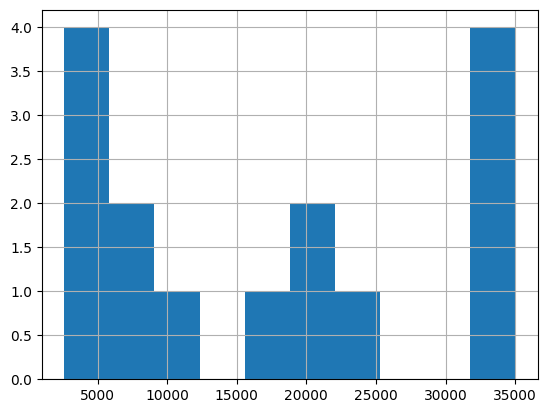

In [57]:
brasil=data[data['company_location']=="BR"]
salario_brasil=brasil['salary_in_usd']/12*5
salario_brasil.hist()

array([[<Axes: title={'center': 'salary_in_usd'}>]], dtype=object)

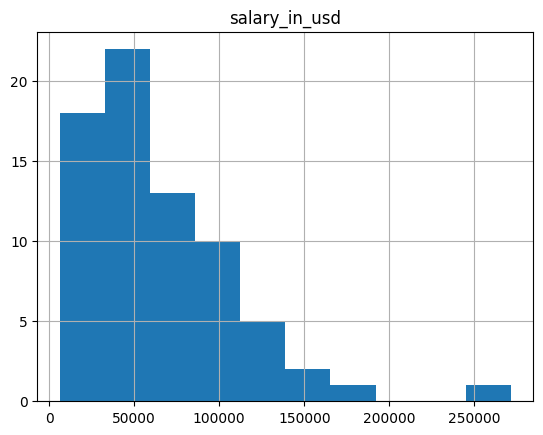

In [58]:
mean_salary_per_country=data.groupby('company_location', as_index=False)['salary_in_usd'].mean()
mean_salary_per_country.hist()

In [59]:
mean_salary_per_country[mean_salary_per_country['company_location']=="BR"]['salary_in_usd']/12*5

10    16908.0
Name: salary_in_usd, dtype: float64

In [60]:
data.groupby('experience_level', as_index=False)['salary_in_usd'].mean()
data.groupby('experience_level', as_index=False)['salary_in_usd'].median()


,experience_level,salary_in_usd
0,EN,70000.0
1,EX,196000.0
2,MI,100000.0
3,SE,146000.0


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [119]:
data['job_title'].unique()


array(['Data Scientist', 'Machine Learning Engineer', 'Applied Scientist',
       'Data Analyst', 'Data Engineer', 'Research Engineer',
       'Analytics Engineer', 'Business Intelligence Engineer',
       'Data Strategist', 'AI Developer', 'Research Scientist',
       'ETL Engineer', 'Head of Data', 'Data Manager',
       'Machine Learning Scientist', 'Data Specialist', 'MLOps Engineer',
       'AI Scientist', 'Autonomous Vehicle Technician', 'AI Programmer',
       'BI Developer', 'Deep Learning Researcher', 'Data Lead',
       'NLP Engineer', 'Manager Data Management',
       'Data Management Specialist', 'Machine Learning Manager',
       'ETL Developer', 'Head of Machine Learning'], dtype=object)

In [63]:
data.loc[data['job_title'].str.contains('Data Scientist', case=False), 'job_title'] = 'Data Scientist'


In [64]:
data.loc[data['job_title'].str.contains('Data Engineer', case=False), 'job_title'] = 'Data Engineer'


In [65]:
data.loc[data['job_title'].str.contains('Data Analyst', case=False), 'job_title'] = 'Data Analyst'


In [80]:
data.loc[data['job_title'].str.contains('Data Analytics', case=False), 'job_title'] = 'Data Analyst'


In [66]:
data.loc[data['job_title'].str.contains('Data Architect', case=False), 'job_title'] = 'Data Architect'

In [67]:
data.loc[data['job_title'].str.contains('Data Science', case=False), 'job_title'] = 'Data Scientist'


In [68]:
data.loc[data['job_title'].str.contains('Machine Learning Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'

In [84]:
data.loc[data['job_title'].str.contains('Computer Vision', case=False), 'job_title'] = 'Machine Learning Engineer'

In [70]:
data.loc[data['job_title'].str.contains('ML Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'

In [71]:
data.loc[data['job_title'].str.contains('AI Scientist', case=False), 'job_title'] = 'AI Scientist'


In [73]:
data.loc[data['job_title'].str.contains('Machine Learning Developer', case=False), 'job_title'] = 'AI Developer'


In [74]:
data.loc[data['job_title'].str.contains('Power BI Developer', case=False), 'job_title'] = 'BI Developer'


In [75]:
data.loc[data['job_title'].str.contains('Machine Learning Software Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'


In [76]:
data.loc[data['job_title'].str.contains('Machine Learning Research Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'


In [77]:
data.loc[data['job_title'].str.contains('Deep Learning Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'


In [ ]:
data.loc[data['job_title'].str.contains('Deep Learning Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'


In [91]:
data.loc[data['job_title'].str.contains('Data Operations Engineer', case=False), 'job_title'] = 'Data Engineer'


In [93]:
data.loc[data['job_title'].str.contains('Data DevOps Engineer', case=False), 'job_title'] = 'Data Engineer'


In [98]:
data.loc[data['job_title'].str.contains('Data Quality Analyst', case=False), 'job_title'] = 'Data Analyst'


In [99]:
data.loc[data['job_title'].str.contains('BI Analyst', case=False), 'job_title'] = 'Data Analyst'


In [100]:
data.loc[data['job_title'].str.contains('Insight Analyst', case=False), 'job_title'] = 'Data Analyst'


In [101]:
data.loc[data['job_title'].str.contains('Data Operations Analyst', case=False), 'job_title'] = 'Data Analyst'


In [105]:
data.loc[data['job_title'].str.contains('Applied Machine Learning Scientist', case=False), 'job_title'] = 'Machine Learning Scientist'


In [106]:
data.loc[data['job_title'].str.contains('Machine Learning Researcher', case=False), 'job_title'] = 'Machine Learning Scientist'


In [108]:
data.loc[data['job_title'].str.contains('Machine Learning Infrastructure Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'


In [112]:
data.loc[data['job_title'].str.contains('Data Modeler', case=False), 'job_title'] = 'Data Engineer'


In [113]:
data.loc[data['job_title'].str.contains('Data Architect', case=False), 'job_title'] = 'Data Engineer'


In [114]:
data.loc[data['job_title'].str.contains('Data Infrastructure Engineer', case=False), 'job_title'] = 'Data Engineer'


In [115]:
data.loc[data['job_title'].str.contains('Cloud Database Engineer', case=False), 'job_title'] = 'Data Engineer'


In [121]:
data.loc[data['job_title'].str.contains('Applied Scientist', case=False), 'job_title'] = 'Data Scientist'


In [122]:
data.loc[data['job_title'].str.contains('BI', case=False), 'job_title'] = 'Business Intelligence'


In [123]:
data.loc[data['job_title'].str.contains('Business Intelligence', case=False), 'job_title'] = 'Business Intelligence'


In [125]:
data.loc[data['job_title'].str.contains('Deep Learning Researcher', case=False), 'job_title'] = 'Machine Learning Scientist'


In [126]:
data.loc[data['job_title'].str.contains('AI Programmer', case=False), 'job_title'] = 'AI Developer'


In [130]:
data.loc[data['job_title'].str.contains('NLP Engineer', case=False), 'job_title'] = 'Machine Learning Engineer'


In [134]:
data.loc[data['job_title'].str.contains('Data Management Specialist', case=False), 'job_title'] = 'Data Specialist'

In [137]:
data.loc[data['job_title'].str.contains('Data Manager', case=False), 'job_title'] = 'Manager Data'

In [138]:
data.loc[data['job_title'].str.contains('Head of Data', case=False), 'job_title'] = 'Manager Data'

In [139]:
data.loc[data['job_title'].str.contains('Data Lead', case=False), 'job_title'] = 'Manager Data'

In [140]:
data.loc[data['job_title'].str.contains('Manager Data Management', case=False), 'job_title'] = 'Manager Data'

In [144]:
data.loc[data['job_title'].str.contains('Machine Learning Manager', case=False), 'job_title'] = 'Manager Machine Learning'

In [145]:
data.loc[data['job_title'].str.contains('Head of Machine Learning', case=False), 'job_title'] = 'Manager Machine Learning'

In [149]:
data.loc[data['job_title'].str.contains('AI Scientist', case=False), 'job_title'] = 'Machine Learning Scientist'

In [160]:
data['job_title'].nunique()

17

In [158]:
data = data.drop(data[data.job_title == "Autonomous Vehicle Technician"].index)